<a href="https://colab.research.google.com/github/Rand0mB0t/keylog-analysis/blob/master/Keylog_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Log Data Exploration

I Have been collecting my keylog data from my office laptop since last three months , I started from last year late october so now I have accumulated keylog data for almost 4 months .  This is my first data exploration personal project. I am not sure about this but I think 4 months of data would be a good enough amount of data to call it a dataset, and to start exploratory analysis on this.


Lets get started with it.

Let's do some imports first

In [0]:
import pandas as pd
import numpy as np

*The dataset is in my personal google drive , I do not want to expose my keystrokes to the world :p* and I am using google colab notebook to perform the data exploration and It has a very cool feature to link your google drive to it, so I have uploaded my dataset to my google drive and now accessing it from collab. So I can continue my exploration whenever and wherever I want, as long as I have access to a computer and internet connection.

**First thing first** Lets have a look at the dataset, How it looks in its file. 

In [3]:
!head '/content/drive/My Drive/keylog_analysis/keyLog_20200223T130834.log'

2019-10-28 18:47:31,596:Key.space
2019-10-28 18:47:32,392:Key.space
2019-10-28 18:47:34,802:'t'
2019-10-28 18:47:34,980:'h'
2019-10-28 18:47:35,018:'i'
2019-10-28 18:47:35,253:'s'
2019-10-28 18:47:43,463:Key.alt_l
2019-10-28 18:47:43,619:Key.up
2019-10-28 18:47:44,136:Key.alt_l
2019-10-28 18:47:44,791:Key.left


Okay, So It looks like we can classify this dataset as a CSV and we have to understand what is the delimiter in this dataset. These are the things in dataset  that I see :


*   Date
*   Time
*   A comma separated number , I do not know what it is
*   and at last our keystroke information

After seeing this data one thing is for sure, It is a **time-series** data.

So, I know the code I wrote for logging this data , is just logging **time:keystroke** . With this knowledge about the data, I can be sure that there are really two parts to this data, and now I know what that comma separtaed value could be, It is milliseconds.

Lets write again what we see in our dataset:
*  DateTime
*  Keystroke

and these two things are separated by a colon **:** .

But there is one issue now, the timestamp contains **:** for separating the 
Time. I have to figure out how to read this dataset with two columns providing the correct delimiter because if I provide colon as a delimiter then I would get these columns 
1. Date with Hour
2. minutes
3. seconds with milliseconds
4. keystroke

Well, I can handle this, I'll load it with colon as delimiter and then merge
first 3 columns as timestamp and leave keystroke as it is. This way I would be left with just two columns that I require
1. Timestamp 
2. Keystroke

Enough talking , Let's get on to loading the data .  Yaaay!!




In [0]:
DATASET_LOCATION = '/content/drive/My Drive/keylog_analysis/keyLog_20200223T130834.log'

Now I have the location of my dataset in a variable so that I do not have to remember the location or type in everytime I run the notebook 
and also , If I happen to change the location of the dataset or try to reuse this notebook for some other dataset, I just have to update the location here.




In [0]:
KEYLOG_DF = pd.read_csv(DATASET_LOCATION, delimiter=':')

Lets Have a look at what we loaded

In [6]:
KEYLOG_DF.head()

,2019-10-28 18,47,"31,596",Key.space
0,2019-10-28 18,47,"32,392",Key.space
1,2019-10-28 18,47,"34,802",'t'
2,2019-10-28 18,47,"34,980",'h'
3,2019-10-28 18,47,"35,018",'i'
4,2019-10-28 18,47,"35,253",'s'


There are no headers in my dataset, Lets reload it with the headers that I decided upon ( Date with Hour, minute, seconds with millisecond and keystroke )

In [0]:
header = ['Date_with_hour','minute','second_with_millisecond','keystroke']
KEYLOG_DF = pd.read_csv(DATASET_LOCATION, delimiter=':', names=header)

In [8]:
KEYLOG_DF.head()

,Date_with_hour,minute,second_with_millisecond,keystroke
0,2019-10-28 18,47,"31,596",Key.space
1,2019-10-28 18,47,"32,392",Key.space
2,2019-10-28 18,47,"34,802",'t'
3,2019-10-28 18,47,"34,980",'h'
4,2019-10-28 18,47,"35,018",'i'


First, Lets separate hour from Date

In [9]:
KEYLOG_DF['date'] = KEYLOG_DF['Date_with_hour'].apply(lambda x: x.split()[0])
KEYLOG_DF['hour'] = KEYLOG_DF['Date_with_hour'].apply(lambda x: x.split()[1])
KEYLOG_DF['second'] = KEYLOG_DF['second_with_millisecond'].apply(lambda x: x.split(',')[0])
KEYLOG_DF['millisecond'] = KEYLOG_DF['second_with_millisecond'].apply(lambda x: x.split(',')[1])
KEYLOG_DF.head()

,Date_with_hour,minute,second_with_millisecond,keystroke,date,hour,second,millisecond
0,2019-10-28 18,47,"31,596",Key.space,2019-10-28,18,31,596
1,2019-10-28 18,47,"32,392",Key.space,2019-10-28,18,32,392
2,2019-10-28 18,47,"34,802",'t',2019-10-28,18,34,802
3,2019-10-28 18,47,"34,980",'h',2019-10-28,18,34,980
4,2019-10-28 18,47,"35,018",'i',2019-10-28,18,35,018


In [10]:
# Lets drop the unused column
KEYLOG_DF.drop(['Date_with_hour', 'second_with_millisecond'], axis=1, inplace=True)
KEYLOG_DF.head()

,minute,keystroke,date,hour,second,millisecond
0,47,Key.space,2019-10-28,18,31,596
1,47,Key.space,2019-10-28,18,32,392
2,47,'t',2019-10-28,18,34,802
3,47,'h',2019-10-28,18,34,980
4,47,'i',2019-10-28,18,35,018


Lets smash these scattered date and time columns to one datetime column

In [11]:
KEYLOG_DF['datetime'] = KEYLOG_DF[['date',
                                   'hour',
                                   'minute',
                                   'second',
                                   'millisecond']].apply(
                                       lambda x: '{} {}:{}:{} {}'.format(
                                           x.date,
                                           x.hour,
                                           x.minute,
                                           x.second,
                                           x.millisecond),
                                      axis = 1 
                                   )
KEYLOG_DF.head()

,minute,keystroke,date,hour,second,millisecond,datetime
0,47,Key.space,2019-10-28,18,31,596,2019-10-28 18:47:31 596
1,47,Key.space,2019-10-28,18,32,392,2019-10-28 18:47:32 392
2,47,'t',2019-10-28,18,34,802,2019-10-28 18:47:34 802
3,47,'h',2019-10-28,18,34,980,2019-10-28 18:47:34 980
4,47,'i',2019-10-28,18,35,018,2019-10-28 18:47:35 018


The above cell that I ran took good amount of time, It can mean two things:
1. I am not using correct functions to do that, or
2. Doing operation across multiple columns is always costly


There is still some cleaning to be done in the **keystroke** column as it contains single quote around our data.

In [0]:
# Going forward if I need to perform any experiment on the shape of 
# dataframe, so just to be safe that I do not modify the actual dataframe and require me to reload it from the file.
copy_keylog = KEYLOG_DF

In [0]:
KEYLOG_DF.keystroke = KEYLOG_DF.apply(lambda x: x['keystroke'].strip("'"), axis=1)

Lets settle at this shape of our dataset.
I have two main variables that I thought to have earlier 
1. datetime
2. keystroke

other are just some extra variables that might come in handy when doing some calculations , So I am gonna leave them there.


In [14]:
KEYLOG_DF.columns

Index(['minute', 'keystroke', 'date', 'hour', 'second', 'millisecond',
       'datetime'],
      dtype='object')

Lets do some cosmetic change, I really don't like the order in which the variables are, 
lets make them in this order:
date, minute, second, millisecond, keystroke 
I think for **brevity** this is the right order.

In [65]:
KEYLOG_DF = KEYLOG_DF[['date', 'minute', 'second', 'millisecond', 'keystroke']]
copy_keylog = KEYLOG_DF
KEYLOG_DF.head(10)

,date,minute,second,millisecond,keystroke
0,2019-10-28,47,31,596,Key.space
1,2019-10-28,47,32,392,Key.space
2,2019-10-28,47,34,802,T
3,2019-10-28,47,34,980,H
4,2019-10-28,47,35,018,I
5,2019-10-28,47,35,253,S
6,2019-10-28,47,43,463,Key.alt_l
7,2019-10-28,47,43,619,Key.up
8,2019-10-28,47,44,136,Key.alt_l
9,2019-10-28,47,44,791,Key.left


This took a while and a whole lot of thinking, But now I think my dataset is ready.

Lets see the questions that I want to get answered from this dataset.

I have categorized the questions into three levels considered how difficult or 
easy the're gonna be to answer.

## BASIC ( EASY ) 
  1. What is the Most used Key ?
  2. What is the Least used Key ?
  3. What are the most used key combos ( experimental question ) ?
---

## INTERMEDIATE ( MEDIUM ) 
	
  1. Frequency distribution of keystrokes ( visualise this )
  2. Create keyboard HEATMAP 
  3. look for pwd ( Experimental )

---

## ADVANCE ( HARD ) 

1. Get an idea about active sessions ( time at which i was active ) 
	- Generate visuals for my active sessions in a day - ( Define what do you call a visual )
	- What is the average time of the session ? 
		- WORKDAYS on MON - THU and on FRI (~ bcoz of change in work timings)
		- WEEKENDS Sat and Sun
	- Keeping sessions in mind
      - Keeping sessions in mind , What is (by far) the first key that I press ?
      - find average typing speed 
		ADVANCE use case 
		- Find average typing speed ( minus the records which include backspace ) i.e, What is average speed for perfect typing ?


### Lets start with BASIC
First question 
##1. What is the most key used ?

#### To answer this question I have to make it case insensitive i.e, a and A are two different values but they are from the same key, So I have to make a and A the same and similarly for every alphabet.

> Here I am only considering for alphabet not for keys which can be used with shift to write a different character



In [0]:
KEYLOG_DF_case_insensitive = KEYLOG_DF
KEYLOG_DF_case_insensitive.keystroke = KEYLOG_DF.apply(lambda x: x.keystroke.upper() if x.keystroke.isalpha() else x.keystroke, axis=1)

In [17]:
KEYLOG_DF_case_insensitive.head()

,date,minute,second,millisecond,keystroke
0,2019-10-28,47,31,596,Key.space
1,2019-10-28,47,32,392,Key.space
2,2019-10-28,47,34,802,T
3,2019-10-28,47,34,980,H
4,2019-10-28,47,35,018,I


In [18]:
KEYLOG_DF_case_insensitive.keystroke.describe()

count         682038
unique            89
top       Key.ctrl_l
freq           86478
Name: keystroke, dtype: object

In [19]:
key_press_count_series = KEYLOG_DF_case_insensitive.keystroke.value_counts().apply(
    lambda x: np.NaN if x == 1 else int(x)
    )
key_press_count_series

Key.ctrl_l         86478.0
Key.shift          61492.0
Key.space          40091.0
Key.backspace      34434.0
E                  28075.0
                    ...   
Key.menu               9.0
Key.f11                7.0
Key.f3                 4.0
Key.scroll_lock        3.0
<177>                  NaN
Name: keystroke, Length: 89, dtype: float64

In [0]:
most_used_key = key_press_count_series.idxmax()
times_pressed = key_press_count_series.max()

In [21]:
print('I have used {} key the most and to be precise \
I have smashed it {} times'.format(
    most_used_key,
    times_pressed
))

I have used Key.ctrl_l key the most and to be precise I have smashed it 86478.0 times


Boo Yeah ! , I have answered my first question. 
---
Lets answer second one 

##2. What is the least key used ?

In [0]:
least_used_key = key_press_count_series.idxmin()
times_pressed = key_press_count_series.min()

In [23]:
print('I have used {} key the least and to be precise \
I have touched it just {} times'.format(
    least_used_key,
    times_pressed
))

I have used Key.scroll_lock key the least and to be precise I have touched it just 3.0 times


This doesn't seems right, The data said that I have used p,m, and some other alphabets just 1 times.

After spending 30 min into this thought, I got to know that i haven't really
cleaned my data, the keystroke column contains the keystroke with a single quote
around it if the keystroke is alphabet.

I'll perform this cleaning now in above cells and Rerun the see the correct answer. 

I just wrote it here so that I know how important is cleaning and understanding
your data before asking questions from it, or else you would get wrong answers
simply because your data is not cleaning

Okay, So I updated my logic as I got one keycode **<177>** as the key which I have pressed just 1 time within last 3 months and I don't but that may be it is some special key combination or something , I have spend quite a time in finding what this keycode or code represent and I am lost I couldn't find what it is for. 
So, I decided to remove any key which I have touched only once because that really can't be the case that I have touched a key just once. Or it could be but this is what I am going to assume for now 



## 3. What are the most used Key combos ? 
This was an experimental question. And the dataset of keystroke does not log the key combos. So I can not answer this question from my dataset. 

## INTERMEDIATE

###1. Frequency distribution of keystrokes ( visualize this ) 

Lets do imports for visualizations 

In [0]:
import matplotlib.pyplot as plt

In [0]:
keystroke_series = KEYLOG_DF_case_insensitive.keystroke.value_counts()
keys = list(keystroke_series.keys())
frequency = list(keystroke_series.values)

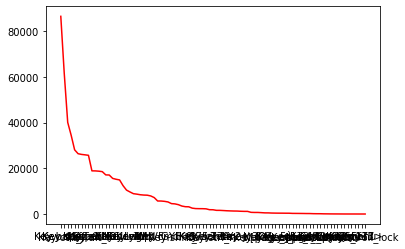

In [59]:
plt.plot(keys, frequency, 'r-')

This is the most basic plot that can be plotted. And none of the keystroke name is visible in x-axis, I have to tweak to have a good visual . Because this plot is really useless to ingere anything.

Let's add some other things to our visualisation to make it look better and understandable


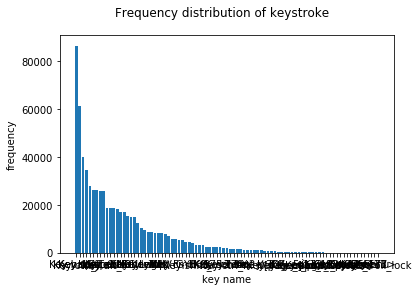

In [60]:
plt.bar(keys, frequency)
plt.ylabel('frequency')
plt.xlabel('key name')
plt.suptitle('Frequency distribution of keystroke')
plt.show()

So now I have created a Bar chart, Lets make it more readable , and try to fit all this information in a chart that can fit in one screen. Remember 105 keys means 105 bars, and all have to fit in one screen and also they have to be readable

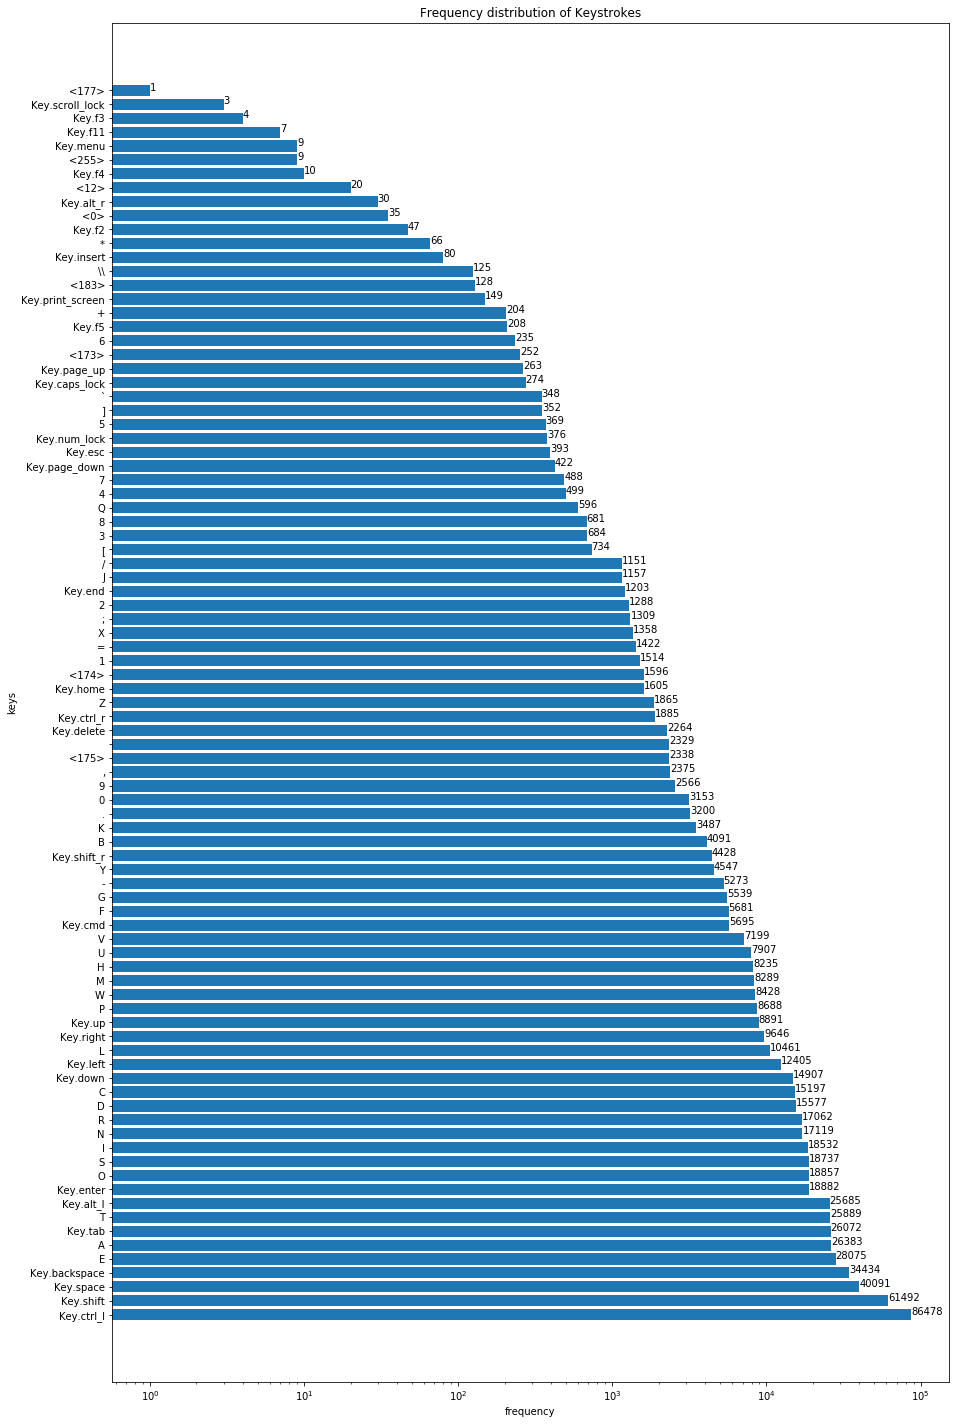

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,25))
ax.barh(keys, frequency, log=True)
ax.set_xlabel('frequency')
ax.set_ylabel('keys')
ax.set_title('Frequency distribution of Keystrokes')
# To add the frequency value to top of bar , keeping x = value, and y = index
[ax.text(value, index, '{:d}'.format(value)) for index, value in enumerate(frequency)]
plt.show()

I have visualised frequency distribution of keystroke
Just as an add on , I will look if I can make this plot interactive 